# Wykresy położenia

In [2]:
#trzeba dawać w konsoli (zbiera dane przez 150s)
rosbag record --duration=150 -O /home/ubuntu/catkin_ws/src/cwiczenia/Projekt/dataBag.bag /R1/pose /R1/cmd_vel /R1/battery /R2/pose /R2/cmd_vel /R2/battery /R3/pose /R3/cmd_vel /R3/battery

[ERROR] [1625832055.438490100]: Error reading options: Duration must start with a floating point number.


In [1]:
import csv # biblioteka do obsługi plików CSV
import rosbag
import rospy
import matplotlib.pyplot as plt

bag_name = "/home/ubuntu/catkin_ws/src/cwiczenia/Projekt/dataBag.bag" #nazwa baga utworzonego wyzej 
# Podać nazwę zarejestrowanego baga z Zadania 1

def create_pose_csv_file(bag_name, file_name, pose_topic_name):
    # Utworzenie pliku o podanej nazwie file_name i zapisywanie danych do pliku
    bag = rosbag.Bag(bag_name)
    with open(file_name, mode='w') as data_file:
        data_writer = csv.writer(data_file, delimiter=',')
        # Ustawienie nagłówka
        data_writer.writerow(['pose x', 'pose y']) 
        # W każdej iteracji pętli odczytywana jest kolejna wiadomość, która pojawiła
        # się na topicu /robot1/pose
        for topic, msg, t in bag.read_messages(topics=[pose_topic_name]):
            # Zapis położenia x,y robota do pliku
            data_writer.writerow([msg.x, msg.y])
    bag.close()
    
def create_cmd_vel_csv_file(bag_name, file_name, pose_topic_name):
    # Utworzenie pliku o podanej nazwie file_name i zapisywanie danych do pliku
    bag = rosbag.Bag(bag_name)
    with open(file_name, mode='w') as data_file:
        data_writer = csv.writer(data_file, delimiter=',')
        # Ustawienie nagłówka
        data_writer.writerow(['linear', 'angular']) 
        # W każdej iteracji pętli odczytywana jest kolejna wiadomość, która pojawiła
        # się na topicu /robot1/cmd_vel, /robot2/cmd_vel itd.
        for topic, msg, t in bag.read_messages(topics=[pose_topic_name]):
            # Zapis położenia x,y robota do pliku
            data_writer.writerow([msg.linear.x, msg.angular.z])
    bag.close()
    
def create_battery_csv_file(bag_name, file_name, pose_topic_name):
    # Utworzenie pliku o podanej nazwie file_name i zapisywanie danych do pliku
    bag = rosbag.Bag(bag_name)
    with open(file_name, mode='w') as data_file:
        data_writer = csv.writer(data_file, delimiter=',')
        # Ustawienie nagłówka
        data_writer.writerow(['battery']) 
        # W każdej iteracji pętli odczytywana jest kolejna wiadomość, która pojawiła
        # się na topicu /robot1/cmd_vel, /robot2/cmd_vel itd.
        for topic, msg, t in bag.read_messages(topics=[pose_topic_name]):
            # Zapis położenia x,y robota do pliku
            data_writer.writerow([msg.data])
    bag.close()
    
def get_robot_pose(file_name):
    # Zmienne x,y przechowujące informacje o położeniu robota.
    x = []
    y = []
    # Otworzenie zapisanego pliku
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        # Pętla do iteracji po kolejnych wierszach pliku
        for row in csv_reader:
            if line_count == 0:
                line_count += 1
            else:
                line_count += 1
                # Dopisanie na końcu listy kolejnego odczytanego położenia x, y
                x.append(float(row[0]))
                y.append(float(row[1]))
    return x, y

def get_robot_cmd_vel(file_name):
    # Zmienne x,y przechowujące informacje o położeniu robota.
    linear_x = []
    angular_z = []
    # Otworzenie zapisanego pliku
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        # Pętla do iteracji po kolejnych wierszach pliku
        for row in csv_reader:
            if line_count == 0:
                #print("{}    {}".format(row[0], row[1]))
                line_count += 1
            else:
                #print(" {:.2f}      {:.2f} ".format(float(row[0]),float(row[1])))
                line_count += 1
                # Dopisanie na końcu listy kolejnego odczytanego położenia x, y
                linear_x.append(float(row[0]))
                angular_z.append(float(row[1]))
    return linear_x, angular_z
def get_robot_battery(file_name):
    # Zmienne x,y przechowujące informacje o położeniu robota.
    battery = []
    # Otworzenie zapisanego pliku
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        # Pętla do iteracji po kolejnych wierszach pliku
        for row in csv_reader:
            if line_count == 0:
                line_count += 1
            else:
                line_count += 1
                # Dopisanie na końcu listy kolejnego odczytanego położenia x, y
                battery.append(float(row[0]))
    return battery

In [2]:
# Utworzenie plikow z danymi dla robota R1
create_pose_csv_file(bag_name, "R1_pose_data.csv","/R1/pose")
create_cmd_vel_csv_file(bag_name, "R1_cmd_vel_data.csv","/R1/cmd_vel")
create_battery_csv_file(bag_name, "R1_battery_data.csv","/R1/battery")

create_pose_csv_file(bag_name, "R2_pose_data.csv","/R2/pose")
create_cmd_vel_csv_file(bag_name, "R2_cmd_vel_data.csv","/R2/cmd_vel")
create_battery_csv_file(bag_name, "R2_battery_data.csv","/R2/battery")

create_pose_csv_file(bag_name, "R3_pose_data.csv","/R3/pose")
create_cmd_vel_csv_file(bag_name, "R3_cmd_vel_data.csv","/R3/cmd_vel")
create_battery_csv_file(bag_name, "R3_battery_data.csv","/R3/battery")

# Odczyt danych dla robota R1
R1_pose_data = get_robot_pose('R1_pose_data.csv')
R1_cmd_vel_data = get_robot_cmd_vel('R1_cmd_vel_data.csv')
R1_battery_data = get_robot_battery('R1_battery_data.csv')

# Odczyt danych dla robota R2
R2_pose_data = get_robot_pose('R2_pose_data.csv')
R2_cmd_vel_data = get_robot_cmd_vel('R2_cmd_vel_data.csv')
R2_battery_data = get_robot_battery('R2_battery_data.csv')

# Odczyt danych dla robota R3
R3_pose_data = get_robot_pose('R3_pose_data.csv')
R3_cmd_vel_data = get_robot_cmd_vel('R3_cmd_vel_data.csv')
R3_battery_data = get_robot_battery('R3_battery_data.csv')

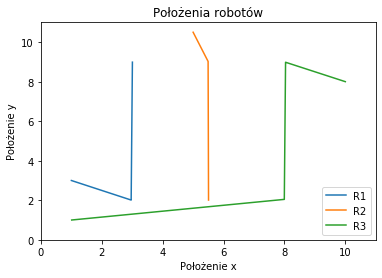

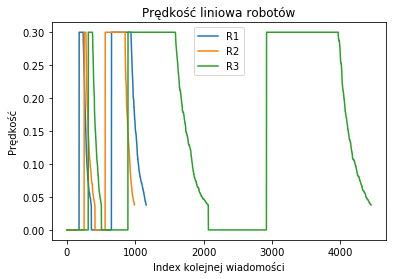

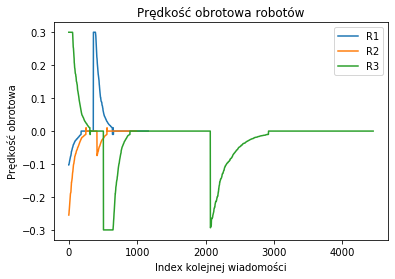

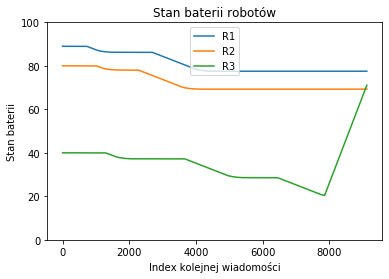

In [3]:
# dane do wyświetlenia
path1, = plt.plot(R1_pose_data[0],R1_pose_data[1], label="R1")
path2, = plt.plot(R2_pose_data[0],R2_pose_data[1], label="R2")
path3, = plt.plot(R3_pose_data[0],R3_pose_data[1], label="R3")
# ustawienie legendy
plt.legend(handles = [path1, path2, path3], loc = 'lower right')
# ustawienie nazw osi
plt.xlabel("Położenie x")
plt.ylabel("Położenie y")
#ustawienie tutułu wykresu
plt.title("Położenia robotów")
#odpowiedni zakres wykresu
plt.ylim(0,11)
plt.xlim(0,11)
# wyświetlenie wykresu
plt.show()

# dane do wyświetlenia
path1, = plt.plot(R1_cmd_vel_data[0], label="R1")
path2, = plt.plot(R2_cmd_vel_data[0], label="R2")
path3, = plt.plot(R3_cmd_vel_data[0], label="R3")
# ustawienie legendy
plt.legend(handles=[path1,path2,path3])
# ustawienie nazw osi
plt.xlabel("Index kolejnej wiadomości")
plt.ylabel("Prędkość")
#ustawienie tutułu wykresu
plt.title("Prędkość liniowa robotów")
# wyświetlenie wykresu
plt.show()

# dane do wyświetlenia
path1, = plt.plot(R1_cmd_vel_data[1], label="R1")
path2, = plt.plot(R2_cmd_vel_data[1], label="R2")
path3, = plt.plot(R3_cmd_vel_data[1], label="R3")
# ustawienie legendy
plt.legend(handles=[path1,path2,path3])
# ustawienie nazw osi
plt.xlabel("Index kolejnej wiadomości")
plt.ylabel("Prędkość obrotowa")
#ustawienie tutułu wykresu
plt.title("Prędkość obrotowa robotów")
# wyświetlenie wykresu
plt.show()

# dane do wyświetlenia
path1, = plt.plot(R1_battery_data, label="R1")
path2, = plt.plot(R2_battery_data, label="R2")
path3, = plt.plot(R3_battery_data, label="R3")
# ustawienie legendy
plt.legend(handles=[path1,path2,path3], loc= "upper center")
# ustawienie nazw osi
plt.xlabel("Index kolejnej wiadomości")
plt.ylabel("Stan baterii")
#ustawienie tutułu wykresu
plt.title("Stan baterii robotów")
# wyświetlenie wykresu
#odpowiedni zakres wykresu
plt.ylim(0,100)
plt.show()